In [1]:
import nltk



1. Choose a corpus of interest.
    Dracula 
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
    20,016 words after removing punctuation
    
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
    The top 88 words account for 50% of the text
4. Identify the 200 highest frequency words in this corpus.
    done, see script
5. Create a graph that shows the relative frequency of these 200 words.
    see below graph (the first)
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
    see below graph (the last one).  Yes, Zipf's law is followed, although the highest freq words diverge
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”
    Looking at the Zipfs law on wikipedia, shows a better fit for large amounts of material.  One theory is that
    Zipfs law is followed due to laziness, perhaps novels attempt to avoid repeating words too often.

In [102]:
#open my file
f = open('/Users/alexandersatz/Documents/Cuny/IS620/dracula.txt')

In [103]:
# need to get rid of newline characters and convert to a string.
# most annoyingly, theres some character that the tokenizer can't recognize.
# and I need to ignore this
s = ''
for line in f:
    line = line.strip()
    line = line.decode('utf-8', 'ignore')
    s = s + line

In [104]:
# now I can tokenize the string
tokens = nltk.word_tokenize(s)

In [106]:
len(tokens)

181846

In [107]:
f = nltk.FreqDist(tokens)

In [109]:
## Many of these 'words' are punctuation, so I want to get rid of these
f.most_common(10)

[(u',', 11394),
 (u'.', 6585),
 (u'the', 6410),
 (u'and', 5209),
 (u'I', 4356),
 (u'to', 3990),
 (u'of', 3273),
 (u'a', 2586),
 (u'in', 2216),
 (u'that', 2144)]

In [112]:
#open my file
import string
f = open('/Users/alexandersatz/Documents/Cuny/IS620/dracula.txt')
s = ''
exclude = set(string.punctuation)
for line in f:
    line = line.strip()
    line = line.decode('utf-8', 'ignore')
    line = ''.join(ch for ch in line if ch not in exclude)  ## get rid of punctuation
    s = s + line

In [113]:
## now I am only looking at words
tokens2 = nltk.word_tokenize(s)
f2 = nltk.FreqDist(tokens2)
f2.most_common(10)

[(u'the', 6362),
 (u'and', 4964),
 (u'I', 4058),
 (u'to', 3971),
 (u'of', 3259),
 (u'a', 2571),
 (u'in', 2196),
 (u'that', 2097),
 (u'he', 1724),
 (u'was', 1618)]

In [158]:
l1 = s.split()
len(set(l1))

20617

In [163]:
fall = f2.most_common(20000)
t = 0
x = 0
while t <0.5:
    t += f2.freq(fall[x][0])
    x += 1
x

88

In [162]:
f2.freq('the')

0.0422275321916899

In [115]:
th = f2.most_common(200)

In [120]:
th[5][0]

u'a'

In [121]:
lw = []
lf = []
for x in th:
    lw.append(x[0])
    lf.append(f2.freq(x[0]))
    

In [125]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

/Users/alexandersatz/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


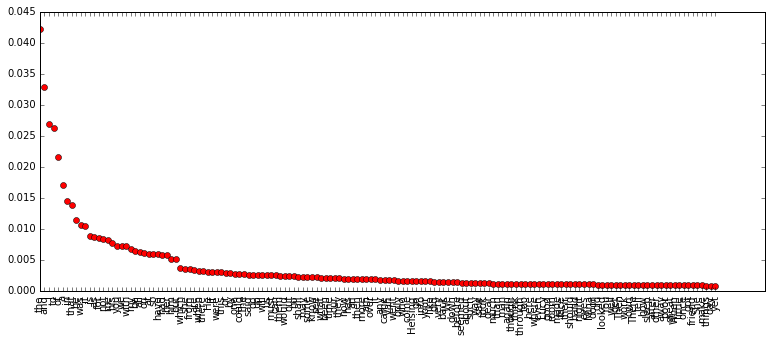

In [136]:
x = list(range(len(lw)-50))
fig = plt.figure(figsize=(13, 5), dpi=100)
plt.plot(x, lf[:-50], 'ro')
plt.xticks(x, lw[:-50], rotation='vertical')
#plt.margins(0.2)
plt.show()

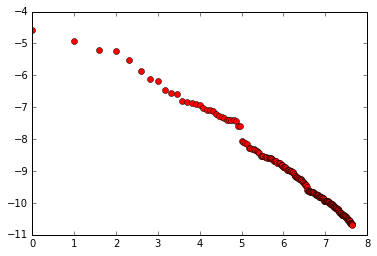

In [152]:
import math
xa = list(range(len(lw)))
xb = []
for x in xa:
    xb.append(math.log(float(x+1),2))
lnew = []
for x in lf:
    lnew.append(math.log(x,2))
plt.plot(xb, lnew, 'ro')
plt.show()